# ANN based regression with pytorch

In this notebook, we will work through setting up a model and running a regression fit on the weather dataset. For more details, see
https://zenodo.org/records/5071376

In [2]:
import pandas as pd

data = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1")

In [1]:
print("Hola mundo")

Hola mundo


In [3]:
data.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [4]:
data.shape

(3654, 91)

In [5]:
nr_rows = 3*365

X_data = data.loc[:nr_rows]
X_data = X_data.drop(columns=['DATE', 'MONTH'])

In [7]:
X_data.shape

(1096, 89)

In [6]:
X_data

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,8,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,3,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,7,0.82,1.0020,0.36,0.00,1.0,8.2,6.7,10.4,8,...,-5.9,-6.8,-5.0,0.88,0.9945,0.09,0.32,11.0,8.2,13.9
1092,8,0.90,1.0041,0.10,0.26,0.0,7.3,5.2,9.3,8,...,-6.4,-7.1,-5.7,0.92,1.0072,0.26,0.40,8.3,6.0,10.6
1093,8,0.79,1.0126,0.16,0.17,0.0,7.8,6.1,13.0,8,...,-9.6,-12.2,-7.0,0.94,1.0107,0.10,0.28,10.5,8.2,12.8
1094,8,0.65,1.0077,0.15,0.00,0.0,12.5,9.7,14.7,8,...,-6.3,-8.5,-4.0,0.88,1.0069,0.34,0.18,11.4,9.6,13.1


In [9]:
y_data = data.loc[1:(nr_rows+1)]["BASEL_sunshine"]
y_data

1       0.0
2       3.7
3       6.9
4       3.7
5       5.7
       ... 
1092    0.0
1093    0.0
1094    0.0
1095    0.0
1096    2.5
Name: BASEL_sunshine, Length: 1096, dtype: float64

In [10]:
X_data.describe()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,5.540146,0.754991,1.017604,1.280265,0.259735,4.527646,11.230201,7.281478,15.628285,5.693431,...,-4.505839,-6.768796,-2.236131,0.798157,1.016250,1.287162,0.228285,12.228011,8.067427,16.389964
std,2.338527,0.102911,0.008037,0.944279,0.507003,4.423591,6.707113,5.946344,7.992811,1.928634,...,6.447168,6.620462,6.416290,0.104863,0.008792,0.912311,0.458911,5.776617,5.142372,6.945459
min,0.000000,0.380000,0.988200,0.060000,0.000000,0.000000,-8.000000,-13.000000,-5.500000,0.000000,...,-23.500000,-28.700000,-21.000000,0.480000,0.976200,0.050000,0.000000,-3.500000,-6.900000,-1.400000
25%,4.000000,0.680000,1.013000,0.480000,0.000000,0.400000,6.600000,3.300000,9.500000,5.000000,...,-8.825000,-11.300000,-6.500000,0.730000,1.011300,0.490000,0.000000,8.200000,4.475000,11.300000
50%,6.000000,0.760000,1.017300,1.015000,0.010000,3.350000,11.300000,7.600000,15.600000,6.000000,...,-4.600000,-6.650000,-2.450000,0.810000,1.016650,1.110000,0.020000,12.000000,8.400000,15.900000
75%,7.000000,0.830000,1.022300,1.982500,0.300000,7.825000,16.600000,11.800000,22.000000,7.000000,...,0.300000,-1.500000,2.200000,0.880000,1.021500,1.970000,0.240000,16.800000,12.000000,21.500000
max,8.000000,0.980000,1.040600,3.520000,4.110000,15.300000,26.800000,19.200000,34.500000,8.000000,...,13.800000,7.000000,14.100000,0.990000,1.038300,3.560000,3.800000,26.500000,21.200000,35.300000


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size=0.3, random_state=1234)

In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=.5,random_state=1234)

In [13]:
print(X_train.shape, X_train.dtypes)
print(y_train.shape, y_train.dtypes)


(767, 89) BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
BASEL_global_radiation    float64
BASEL_precipitation       float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 89, dtype: object
(767,) float64


In [17]:
import torch
#import time

#define the model here
class mlp_model(torch.nn.Module):
    def __init__(self, in_shape = X_data.shape[-1]):
        """Documenting the use of the model"""

        super().__init__()

        self.hidden0 = torch.nn.Linear(in_features = in_shape, out_features = 100)
        self.relu0 = torch.nn.ReLU()
        self.hidden1 = torch.nn.Linear(in_features = 100, out_features = 50)
        self.relu1 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features = 50, out_features = 1)

    def forward(self, x):
        """Documenting the forward pass of the model"""
        h = self.hidden0(x)
        h_ = self.relu0(h)
        output = self.hidden1(h_)
        output_ = self.relu1(output)
        y_hat = self.output(output_)
        return y_hat

In [18]:
model = mlp_model()

In [19]:
model

mlp_model(
  (hidden0): Linear(in_features=89, out_features=100, bias=True)
  (relu0): ReLU()
  (hidden1): Linear(in_features=100, out_features=50, bias=True)
  (relu1): ReLU()
  (output): Linear(in_features=50, out_features=1, bias=True)
)

## How large is our model

When ML researchers or engineers talk about their models, they often use a metric to compare models casually. This metric is the number of parameters. Write code that counts the number of parameters. Use the `nn.Module` API documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) to find an appropriate which provides you with an iterator over all parameters. 

In [20]:
#count the parameters here

num_parameters = sum(p.numel() for p in model.parameters())
print(f"Number of parameters in the model: {num_parameters}")

Number of parameters in the model: 14101


## The training loop

In [21]:
#write the training loop
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()

In [26]:
torch_x_train = torch.from_numpy(X_train.to_numpy())
torch_y_train = torch.from_numpy(y_train.to_numpy())

torch_x_test = torch.from_numpy(X_test.to_numpy())
torch_y_test = torch.from_numpy(y_test.to_numpy())

stacked_train = torch.utils.data.StackDataset(X = torch_x_train, y = torch_y_train)

In [28]:
batch_size = 32
max_num_epochs = 200

train_loader = torch.utils.data.DataLoader(stacked_train, batch_size=batch_size)

num_steps = len(train_loader)

train_mse, train_rmse = torch.zeros((num_steps,)), torch.zeros((num_steps, )) # MEAN SQUARED ERROR AND ROOT MEAN SQUARED ERROR

history = {"train_mse": [], "train_rmse": []}

for epoch in range(max_num_epochs):

  for stepi, batch in enumerate(train_loader):

    X, y = batch["X"].float(), batch["y"].float()

    y_hat = model(X)

    loss = loss_fn(y_hat.view(-1), y)
    rmse = torch.sqrt(loss)

    loss.backward() #thats the back propagation?
    opt.step() # optimizer
    opt.zero_grad()

    train_mse[stepi] = loss.item()
    train_rmse[stepi] = rmse.item()

  if (epoch+1) % 5 == 0:
    print(epoch,train_mse.mean(), train_rmse.mean())

  history["train_mse"].append(train_mse.numpy().mean())
  history["train_rmse"].append(train_rmse.numpy().mean())

4 tensor(2.1603) tensor(1.4430)
9 tensor(2.0896) tensor(1.4211)
14 tensor(1.4792) tensor(1.1856)
19 tensor(1.2390) tensor(1.0892)
24 tensor(1.3833) tensor(1.1428)
29 tensor(1.0736) tensor(1.0062)
34 tensor(1.0808) tensor(1.0114)
39 tensor(0.7999) tensor(0.8711)
44 tensor(0.8323) tensor(0.8888)
49 tensor(0.9922) tensor(0.9599)
54 tensor(0.9620) tensor(0.9612)
59 tensor(1.0300) tensor(0.9893)
64 tensor(1.0929) tensor(1.0102)
69 tensor(0.9039) tensor(0.9327)
74 tensor(1.0507) tensor(0.9953)
79 tensor(0.9595) tensor(0.9507)
84 tensor(0.8078) tensor(0.8769)
89 tensor(0.9804) tensor(0.9800)
94 tensor(1.8018) tensor(1.3136)
99 tensor(1.7918) tensor(1.3289)
104 tensor(1.8791) tensor(1.3567)
109 tensor(2.1620) tensor(1.4400)
114 tensor(2.8677) tensor(1.6631)
119 tensor(1.8596) tensor(1.3364)
124 tensor(1.4376) tensor(1.1749)
129 tensor(1.6288) tensor(1.2364)
134 tensor(2.2283) tensor(1.4634)
139 tensor(3.1473) tensor(1.7272)
144 tensor(2.5644) tensor(1.5544)
149 tensor(3.3791) tensor(1.7946)
15

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(history, metrics):
    """ plot the history of our weather prediction model """

    history_df = pd.DataFrame.from_dict(history)
    data = history_df[metrics]

    sns.lineplot(data=data)
    plt.xlabel("epochs")
    plt.ylabel("metric")


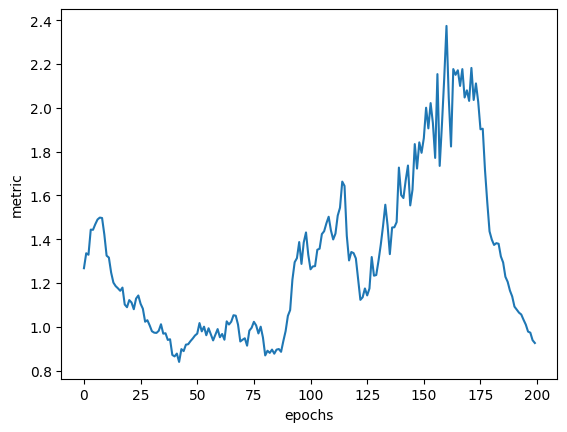

In [31]:
plot_history(history, "train_rmse") #mod

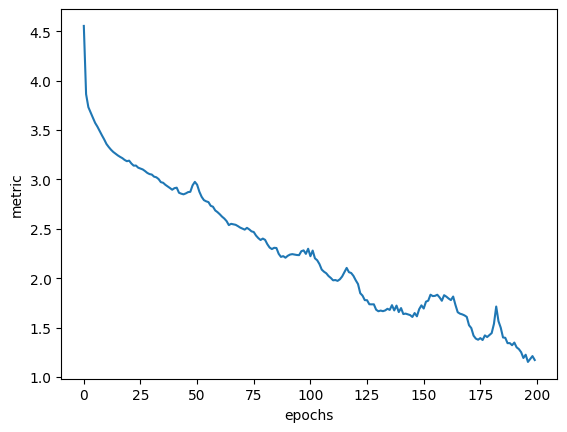

In [18]:
plot_history(history, "train_rmse")

In [32]:
#how do we perform predictions?
y_train_pred = model(torch_x_train.float())
y_test_pred = model(torch_x_test.float())

In [33]:
def plot_predictions(y_pred, y_true, title):
    """ visualize a comparison of predicted versus true values """
    plt.style.use('ggplot')
    plt.scatter(y_pred, y_true, s=10,alpha=0.5)
    plt.xlabel("predicted sunshine hours")
    plt.ylabel("true sunshine hours")
    plt.title(title)


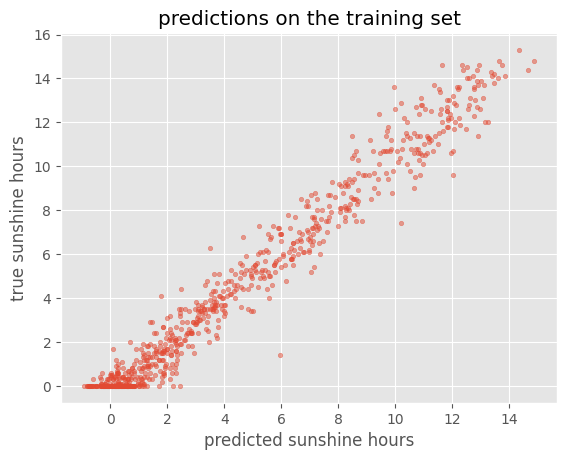

In [34]:
plot_predictions(y_train_pred.detach().numpy(), 
                 torch_y_train.detach().numpy(), 
                 title="predictions on the training set")

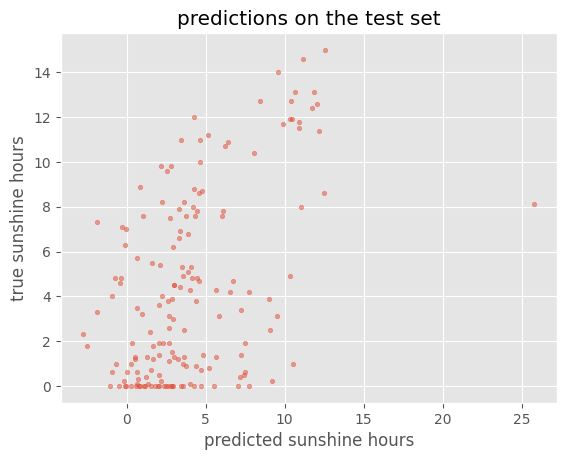

In [35]:
plot_predictions(y_test_pred.detach().numpy(),
                 torch_y_test.detach().numpy(),
                 title="predictions on the test set")

## Exercise: Refining the model

Your task: add the calculation of metrics for the validation set to the training loop. Reuse the code from above and add a second loop into the epoch loop which traverses the validation set. 
To make sure that you train a new model, create a new variable `model2` which is an instantian of our MLP model class. 

In [25]:
...

005/200: 0.0293 loss=12.9637 rmse=3.5833 vloss=11.1970 vrmse=3.2947 1.2 ms/step
010/200: 0.0275 loss=11.0932 rmse=3.3166 vloss=11.1602 vrmse=3.2651 1.1 ms/step
015/200: 0.0235 loss=10.5184 rmse=3.2287 vloss=11.2376 vrmse=3.2623 1.0 ms/step
020/200: 0.0235 loss=10.0536 rmse=3.1557 vloss=11.2659 vrmse=3.2663 1.0 ms/step
025/200: 0.0274 loss=9.6851 rmse=3.0954 vloss=11.2598 vrmse=3.2667 1.1 ms/step
030/200: 0.0241 loss=9.1014 rmse=2.9973 vloss=11.4194 vrmse=3.2895 1.0 ms/step
035/200: 0.0249 loss=8.6219 rmse=2.9182 vloss=12.0831 vrmse=3.4001 1.0 ms/step
040/200: 0.0253 loss=8.0083 rmse=2.8128 vloss=12.7213 vrmse=3.5112 1.1 ms/step
045/200: 0.0421 loss=7.7422 rmse=2.7642 vloss=12.1523 vrmse=3.4162 1.8 ms/step
050/200: 0.0251 loss=7.1011 rmse=2.6495 vloss=12.4200 vrmse=3.4606 1.0 ms/step
055/200: 0.0259 loss=6.6673 rmse=2.5645 vloss=12.6701 vrmse=3.4872 1.1 ms/step
060/200: 0.0255 loss=6.3245 rmse=2.4982 vloss=13.6738 vrmse=3.6525 1.1 ms/step
065/200: 0.0324 loss=6.4139 rmse=2.5158 vloss=12

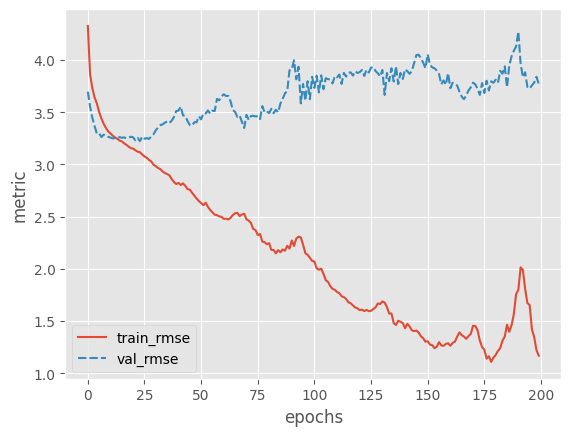

In [26]:
plot_history(history2, ["train_rmse", "val_rmse"])

The validation stops decreasing very early (around epoch 10). After that, the network apparently goes into **overfitting** (training loss decreases, validation loss is constant, fluctuates or increases). 

There are various countermeasures to overfitting. Most of them involve regularisation or remodelling your architecture. Another approach is to stop training altogether when the validation loss is not decreasing anymore. This process of stopping the training is referred to as **Early Stopping**. `pytorch` does not come with a mechanism to invoke early stopping, you would have to resort to 3rd party libraries (e.g. [early-stopping-pytorch](https://github.com/Bjarten/early-stopping-pytorch)) or higher level libraries like [lightning](https://lightning.ai/docs/pytorch/stable/) or [fast.ai](https://www.fast.ai/).